In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Task 2

In [2]:
def find_min_ball(X):
    center = cp.Variable((1, X.shape[1]))
    prob = cp.Problem(cp.Minimize(cp.max(cp.norm(X - center, axis=1))))
    prob.solve()
    return center.value[0], prob.value

In [3]:
def visualize_2d_circle(X, center, radius):
    _, axes = plt.subplots()
    axes.plot(X[:, 0], X[:,1], 'o')
    c = plt.Circle(center, radius, alpha=0.3, fill=False)
    axes.add_patch(c) 
    plt.axis('scaled')
    plt.show()

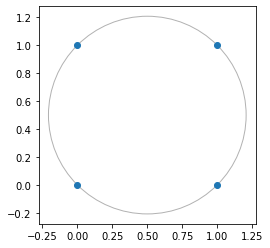

In [4]:
X = np.array([[1, 1], [0, 1], [1, 0], [0, 0]])
center, radius = find_min_ball(X)
visualize_2d_circle(X, center, radius)

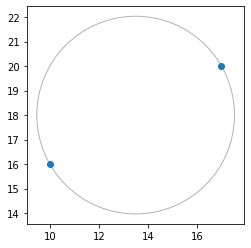

In [5]:
X = np.array([[10, 16], [17, 20]])
center, radius = find_min_ball(X)
visualize_2d_circle(X, center, radius)

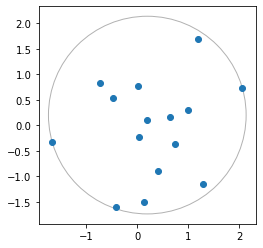

In [6]:
X = np.random.randn(15, 2)
center, radius = find_min_ball(X)
visualize_2d_circle(X, center, radius)

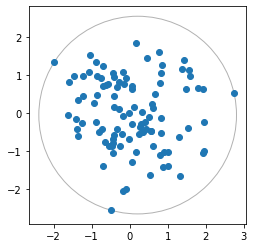

In [7]:
X = np.random.randn(100, 2)
center, radius = find_min_ball(X)
visualize_2d_circle(X, center, radius)

# Task 3

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
def find_best_svm(X, y):
    X_zero = X[y == 0].T
    X_one = X[y == 1].T
    a = cp.Variable((X.shape[1], 1))
    constraints = [cp.norm(a) <= 1]
    obj = cp.Maximize(cp.min(a.T @ X_one) - cp.max(a.T @ X_zero))
    prob = cp.Problem(obj, constraints)
    prob.solve()
    return a.value

In [10]:
X = np.array([[1, 2], [3, 4], [-2, 4], [-1, 0]])
y = np.array([0, 0, 1, 1])
a = find_best_svm(X, y)
print(f'Accuracy of prediction: {accuracy_score(y, (a.T @ X.T > 0)[0].astype(int))}')

Accuracy of prediction: 1.0


In [11]:
X1 = np.random.randn(10, 2)
X2 = np.random.randn(10, 2) + 4
X = np.vstack((X1, X2))
y = np.hstack((np.zeros(10), np. ones(10)))
a = find_best_svm(X, y)
print(f'Accuracy of prediction: {accuracy_score(y, (a.T @ X.T > 0)[0].astype(int))}')

Accuracy of prediction: 0.85
